<a href="https://colab.research.google.com/github/silvia-jesus/CAR_Labrea/blob/main/CAR_RL_Labrea_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
import glob
import shutil
import os
from pathlib import Path

In [ ]:
import time

In [ ]:
if not os.path.exists('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES'):
  os.makedirs('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES')

Path('./').mkdir(parents=True, exist_ok=True)

In [ ]:
if not os.path.exists('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/FIGURAS'):
  os.makedirs('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/FIGURAS')

Path('./').mkdir(parents=True, exist_ok=True)

In [ ]:
if not os.path.exists('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/MODULOS_CAR'):
  os.makedirs('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/MODULOS_CAR')

Path('./').mkdir(parents=True, exist_ok=True)

In [ ]:
value = pd.read_csv('/content/drive/MyDrive/CAR_RL_Labrea/DADOS/code_mapbiomas_legend.csv',sep=';', encoding='latin1')
value['value'] = value['value'].astype(str)
value.head()

,name,code,nome,value
0,"Beach, Dune and Sand Spot",#DD7E6B,"Praia, Duna e Areal",23
1,Citrus,#d082de,Citrus,47
2,Coffee,#cca0d4,Café,46
3,Aquaculture,#02106f,Aquicultura,31
4,Forest Formation,#006400,Formação Florestal,3


In [ ]:
val_dict = dict(zip(value.value, value.nome))
val_dict

{'23': 'Praia, Duna e Areal',
 '47': 'Citrus',
 '46': 'Café',
 '31': 'Aquicultura',
 '3': 'Formação Florestal',
 '9': 'Silvicultura',
 '5': 'Mangue',
 '12': 'Formação Campestre',
 '30': 'Mineração',
 '21': 'Mosaico de Usos',
 '48': 'Outras Lavouras Perenes',
 '13': 'Outras Formações não Florestais',
 '25': 'Outras Áreas não Vegetadas',
 '41': 'Outras Lavouras Temporárias',
 '15': 'Pastagem',
 '33': 'Rio, Lago e Oceano',
 '32': 'Apicum',
 '29': 'Afloramento Rochoso',
 '39': 'Soja',
 '4': 'Formação Savânica',
 '20': 'Cana',
 '24': 'Área Urbanizada',
 '11': 'Campo Alagado e Área Pantanosa',
 '49': 'Restinga Arborizada',
 '50': 'Restinga Herbácea',
 '40': 'Arroz',
 '62': 'Algodão',
 '27': 'Não observado'}

**MÓDULOS CAR**  
**LULC**

In [ ]:
a = glob.glob('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/IM_LULC/Arrays_LULC/lulc_*.csv')
# a

In [ ]:
modulos = ['I','II','III','IV']

In [ ]:
start = time.time()
for mod in modulos:
  lulc_car = glob.glob(f'/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/IM_LULC/Arrays_LULC/lulc_*_{mod}.csv')

  df = pd.concat(map(pd.read_csv, lulc_car), ignore_index=True)
  df = df.iloc[:, 2:] #remove old index and 0 values
  df_fill = df.fillna(0)
  df_fill.to_csv(f'/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/MODULOS_CAR/lulc_{mod}.csv')

end = time.time()
duration = end - start
print(f'O processamento demorou {duration} segundos.')

O processamento demorou 366.49564385414124 segundos.


In [ ]:
files_mod = glob.glob(f'/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/MODULOS_CAR/lulc_*.csv')
files_mod

['/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/MODULOS_CAR/lulc_I.csv',
 '/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/MODULOS_CAR/lulc_II.csv',
 '/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/MODULOS_CAR/lulc_III.csv',
 '/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/MODULOS_CAR/lulc_IV.csv']

In [ ]:
car_I = pd.read_csv('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/MODULOS_CAR/lulc_I.csv').sort_index(axis=1)
car_II = pd.read_csv('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/MODULOS_CAR/lulc_II.csv').sort_index(axis=1)
car_III = pd.read_csv('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/MODULOS_CAR/lulc_III.csv').sort_index(axis=1)
car_IV = pd.read_csv('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/MODULOS_CAR/lulc_IV.csv').sort_index(axis=1)

In [ ]:
print(car_I.columns)
print(car_II.columns)
print(car_III.columns)
print(car_IV.columns)

Index(['11', '12', '15', '3', '30', '33', '4', '41', 'COD_IMOVEL',
       'Unnamed: 0', 'ano'],
      dtype='object')
Index(['11', '12', '15', '3', '33', '4', '41', 'COD_IMOVEL', 'Unnamed: 0',
       'ano'],
      dtype='object')
Index(['11', '12', '15', '3', '33', '4', '41', 'COD_IMOVEL', 'Unnamed: 0',
       'ano'],
      dtype='object')
Index(['11', '12', '15', '24', '3', '33', '4', '41', 'COD_IMOVEL',
       'Unnamed: 0', 'ano'],
      dtype='object')


In [ ]:
df_car_I = car_I[['COD_IMOVEL', 'ano','11', '12', '15', '3', '30', '33', '4', '41']]
df_car_II = car_II[['COD_IMOVEL', 'ano','11', '12', '15', '3', '33', '4', '41']]
df_car_III = car_III[['COD_IMOVEL', 'ano','11', '12', '15', '3', '33', '4', '41']]
df_car_IV = car_IV[['COD_IMOVEL', 'ano','11', '12', '15', '24', '3', '33', '4', '41']]

In [ ]:
df_car_I['Floresta'] = df_car_I['3'] + df_car_I['4']
df_car_I['Formação Natural não Florestal'] = df_car_I['11'] + df_car_I['12']
df_car_I['Agropecuária'] = df_car_I['15'] + df_car_I['41']
df_car_I['Área não Vegetada'] = df_car_I['30']
df_car_I["Corpo D'água"] = df_car_I['33']

In [ ]:
df_car_II['Floresta'] = df_car_II['3'] + df_car_II['4']
df_car_II['Formação Natural não Florestal'] = df_car_II['11'] + df_car_II['12']
df_car_II['Agropecuária'] = df_car_II['15'] + df_car_II['41']
# df_car_II['Área não Vegetada'] = df_car_II['30']
df_car_II["Corpo D'água"] = df_car_II['33']

In [ ]:
df_car_III['Floresta'] = df_car_III['3'] + df_car_III['4']
df_car_III['Formação Natural não Florestal'] = df_car_III['11'] + df_car_III['12']
df_car_III['Agropecuária'] = df_car_III['15'] + df_car_III['41']
# df_car_III['Área não Vegetada'] = df_car_III['30']
df_car_III["Corpo D'água"] = df_car_III['33']

In [ ]:
df_car_IV['Floresta'] = df_car_IV['3'] + df_car_IV['4']
df_car_IV['Formação Natural não Florestal'] = df_car_IV['11'] + df_car_IV['12']
df_car_IV['Agropecuária'] = df_car_IV['15'] + df_car_IV['41']
df_car_IV['Área não Vegetada'] = df_car_IV['24']
df_car_IV["Corpo D'água"] = df_car_IV['33']

In [ ]:
df_lulc_I = df_car_I.iloc[: , :-5] #remove as 5 últimas colunas criadas no recode
df_lulc_II = df_car_II.iloc[: , :-5]
df_lulc_III = df_car_III.iloc[: , :-5]
df_lulc_IV = df_car_IV.iloc[: , :-5]


df_lulc_I.rename(columns = val_dict, inplace = True)#renomeia as colunas pelos valores do dicionário de nomes
df_lulc_II.rename(columns = val_dict, inplace = True)
df_lulc_III.rename(columns = val_dict, inplace = True)
df_lulc_IV.rename(columns = val_dict, inplace = True)

In [ ]:
df_recode_I = pd.concat([df_car_I.iloc[: ,0:2],df_car_I.iloc[: ,-5:]],axis = 1)
df_recode_II = pd.concat([df_car_II.iloc[: ,0:2],df_car_II.iloc[: ,-4:]],axis = 1)  #não tem classes de Área não vegetada
df_recode_III = pd.concat([df_car_III.iloc[: ,0:2],df_car_III.iloc[: ,-4:]],axis = 1)  #não tem classes de Área não vegetada
df_recode_IV = pd.concat([df_car_IV.iloc[: ,0:2],df_car_IV.iloc[: ,-5:]],axis = 1)

In [ ]:
columns_names = df_lulc_I.columns.values.tolist()+ df_lulc_II.columns.values.tolist()+ df_lulc_III.columns.values.tolist()+ df_lulc_IV.columns.values.tolist()
columns_names = np.unique(columns_names)
columns_names

array(['COD_IMOVEL', 'Campo Alagado e Área Pantanosa',
       'Formação Campestre', 'Formação Florestal', 'Formação Savânica',
       'Mineração', 'Outras Lavouras Temporárias', 'Pastagem',
       'Rio, Lago e Oceano', 'ano', 'Área Urbanizada'], dtype='<U30')

In [ ]:
columns_names_recode = df_recode_I.columns.values.tolist()+ df_recode_II.columns.values.tolist()+ df_recode_III.columns.values.tolist()+ df_recode_IV.columns.values.tolist()
columns_names_recode = np.unique(columns_names_recode)
columns_names_recode

array(['Agropecuária', 'COD_IMOVEL', "Corpo D'água", 'Floresta',
       'Formação Natural não Florestal', 'ano', 'Área não Vegetada'],
      dtype='<U30')

In [ ]:
lulc_names = ['Campo Alagado e Área Pantanosa',
       'Formação Campestre', 'Formação Florestal', 'Formação Savânica',
       'Mineração', 'Outras Lavouras Temporárias', 'Pastagem',
       'Rio, Lago e Oceano', 'Área Urbanizada']

superclasses = ['Agropecuária', "Corpo D'água", 'Floresta',
       'Formação Natural não Florestal', 'Área não Vegetada']

In [ ]:
a = 900/10000 #hectares
# a = 900/1000000 #km2

In [ ]:
lulc_frames = [df_lulc_I,df_lulc_II,df_lulc_III,df_lulc_IV]
recode_frames = [df_recode_I,df_recode_II,df_recode_III,df_recode_IV]

In [ ]:
for frame in lulc_frames:
  for name in lulc_names: #pode não haver todas as classes no dataframe do módulo
    k = frame.columns
    if name in k:
      frame[name] = frame[name].apply(lambda x: x*a) #tabela com a área calculada a partir do número de pixels por classes de cobertura da terra

In [ ]:
for frame in recode_frames:
  for name in superclasses: #pode não haver todas as classes no dataframe do módulo
    k = frame.columns
    if name in k:
      frame[name] = frame[name].apply(lambda x: x*a) #tabela com a área calculada a partir do número de pixels por classes de cobertura da terra

In [ ]:
# for frame in lulc_frames:
#   frame.set_index('COD_IMOVEL', inplace=True)

# for frame in recode_frames:
#   frame.set_index('COD_IMOVEL', inplace=True)

In [ ]:
for frame in lulc_frames:
  print(frame.shape)

(2880, 10)
(1200, 8)
(3156, 8)
(6868, 10)


In [ ]:
df_lulc = pd.concat(lulc_frames, axis=0, join = 'outer').fillna(0)
print(df_lulc.shape)

(14104, 11)


In [ ]:
df_lulc['Total']=df_lulc.iloc[:,2:].sum(axis=1)

Tamanho do módulo fiscal: 100 ha  
Fonte: https://pro-pgt-incra.estaleiro.serpro.gov.br/pgt/indices-basicos  
       https://www.embrapa.br/codigo-florestal/area-de-reserva-legal-arl/modulo-fiscal

In [ ]:
df_lulc['MF']=df_lulc['Total']/100

In [ ]:
condicao = [(df_lulc.MF	>4),(df_lulc.MF	<=4) & (df_lulc.MF	>2),(df_lulc.MF	<=2) & (df_lulc.MF	>1),(df_lulc.MF	<=1)]
classes = ['More than 4 FM','2 to 4 FM', '1 to 2 FM', 'Less than 1 FM' ]

df_lulc['Módulos Fiscais'] = np.select(condicao, classes)

df_lulc.head()

,COD_IMOVEL,ano,Campo Alagado e Área Pantanosa,Formação Campestre,Pastagem,Formação Florestal,Mineração,"Rio, Lago e Oceano",Formação Savânica,Outras Lavouras Temporárias,Área Urbanizada,Total,MF,Módulos Fiscais
0,AM-1302405-B78F002E29244400835FEA9ABA8E6AC6,2020,0.0,0.0,2.25,1843.65,0.0,0.0,0.0,0.0,0.0,1845.9,18.459,More than 4 FM
1,AM-1302405-B78F002E29244400835FEA9ABA8E6AC6,2008,0.0,0.0,67.14,1778.76,0.0,0.0,0.0,0.0,0.0,1845.9,18.459,More than 4 FM
2,AM-1302405-B78F002E29244400835FEA9ABA8E6AC6,2012,0.0,0.0,22.23,1823.67,0.0,0.0,0.0,0.0,0.0,1845.9,18.459,More than 4 FM
3,AM-1302405-B78F002E29244400835FEA9ABA8E6AC6,2016,0.0,0.0,11.52,1834.38,0.0,0.0,0.0,0.0,0.0,1845.9,18.459,More than 4 FM
4,AM-1302405-576D22A93BAA4AD7A576F6305E3E6C69,2012,0.0,0.0,43.92,948.78,0.0,0.0,0.0,0.0,0.0,992.7,9.927,More than 4 FM


In [ ]:
cod_imovel = ['AM-1302405-8C68014707E543FA8B54A7C8488CEB56','AM-1302405-D9FE0152C74047A682B2CFFE1AC08FD5','AM-1302405-B0B1C7DBC5264B89BD8B0D8F0A64569F']

In [ ]:
df_lulc.shape

(14104, 14)

In [ ]:
df_lulc_filtered = df_lulc[df_lulc['COD_IMOVEL'].isin(cod_imovel) == False]

print(df_lulc_filtered.shape)

(14092, 14)


In [ ]:
df_recode = pd.concat(recode_frames, axis=0, join = 'outer').fillna(0)
print(df_recode.shape)

(14104, 7)


In [ ]:
df_recode['Total']=df_recode.iloc[:,2:].sum(axis=1)

In [ ]:
df_recode['MF']=df_recode['Total']/100 #módulo fiscal em Lábrea em hectares


In [ ]:
condicao = [(df_recode.MF	>4),(df_recode.MF	<=4) & (df_recode.MF	>2),(df_recode.MF	<=2) & (df_recode.MF	>1),(df_recode.MF	<=1)]
classes = ['More than 4 FM','2 to 4 FM', '1 to 2 FM', 'Less than 1 FM' ]

df_recode['Módulos Fiscais'] = np.select(condicao, classes)

df_recode.head()

,COD_IMOVEL,ano,Floresta,Formação Natural não Florestal,Agropecuária,Área não Vegetada,Corpo D'água,Total,MF,Módulos Fiscais
0,AM-1302405-B78F002E29244400835FEA9ABA8E6AC6,2020,1843.65,0.0,2.25,0.0,0.0,1845.9,18.459,More than 4 FM
1,AM-1302405-B78F002E29244400835FEA9ABA8E6AC6,2008,1778.76,0.0,67.14,0.0,0.0,1845.9,18.459,More than 4 FM
2,AM-1302405-B78F002E29244400835FEA9ABA8E6AC6,2012,1823.67,0.0,22.23,0.0,0.0,1845.9,18.459,More than 4 FM
3,AM-1302405-B78F002E29244400835FEA9ABA8E6AC6,2016,1834.38,0.0,11.52,0.0,0.0,1845.9,18.459,More than 4 FM
4,AM-1302405-576D22A93BAA4AD7A576F6305E3E6C69,2012,948.78,0.0,43.92,0.0,0.0,992.7,9.927,More than 4 FM


In [ ]:
df_recode.shape

(14104, 10)

In [ ]:
df_recode_filtered = df_recode[df_recode['COD_IMOVEL'].isin(cod_imovel) == False]

print(df_recode_filtered.shape)

(14092, 10)


In [ ]:
count_imoveis = df_recode_filtered.groupby(['ano','Módulos Fiscais'])['COD_IMOVEL'].count()
count_imoveis

ano   Módulos Fiscais
2008  1 to 2 FM           987
      2 to 4 FM           274
      Less than 1 FM     1497
      More than 4 FM      765
2012  1 to 2 FM           987
      2 to 4 FM           274
      Less than 1 FM     1497
      More than 4 FM      765
2016  1 to 2 FM           987
      2 to 4 FM           274
      Less than 1 FM     1497
      More than 4 FM      765
2020  1 to 2 FM           987
      2 to 4 FM           274
      Less than 1 FM     1497
      More than 4 FM      765
Name: COD_IMOVEL, dtype: int64

In [ ]:
imovel_vegnat = df_recode_filtered.copy()
imovel_vegnat['Vegetação Nativa'] = imovel_vegnat['Floresta'] + imovel_vegnat['Formação Natural não Florestal']
imovel_vegnat.to_csv('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/imovel_vegnat.csv')

In [ ]:
imovel_vegnat.head()

,COD_IMOVEL,ano,Floresta,Formação Natural não Florestal,Agropecuária,Área não Vegetada,Corpo D'água,Total,MF,Módulos Fiscais,Vegetação Nativa
0,AM-1302405-B78F002E29244400835FEA9ABA8E6AC6,2020,1843.65,0.0,2.25,0.0,0.0,1845.9,18.459,More than 4 FM,1843.65
1,AM-1302405-B78F002E29244400835FEA9ABA8E6AC6,2008,1778.76,0.0,67.14,0.0,0.0,1845.9,18.459,More than 4 FM,1778.76
2,AM-1302405-B78F002E29244400835FEA9ABA8E6AC6,2012,1823.67,0.0,22.23,0.0,0.0,1845.9,18.459,More than 4 FM,1823.67
3,AM-1302405-B78F002E29244400835FEA9ABA8E6AC6,2016,1834.38,0.0,11.52,0.0,0.0,1845.9,18.459,More than 4 FM,1834.38
4,AM-1302405-576D22A93BAA4AD7A576F6305E3E6C69,2012,948.78,0.0,43.92,0.0,0.0,992.7,9.927,More than 4 FM,948.78


In [ ]:
df_lulc_filtered.head(1)

,COD_IMOVEL,ano,Campo Alagado e Área Pantanosa,Formação Campestre,Pastagem,Formação Florestal,Mineração,"Rio, Lago e Oceano",Formação Savânica,Outras Lavouras Temporárias,Área Urbanizada,Total,MF,Módulos Fiscais
0,AM-1302405-B78F002E29244400835FEA9ABA8E6AC6,2020,0.0,0.0,2.25,1843.65,0.0,0.0,0.0,0.0,0.0,1845.9,18.459,More than 4 FM


In [ ]:
df_lulc_filtered.columns

Index(['COD_IMOVEL', 'ano', 'Campo Alagado e Área Pantanosa',
       'Formação Campestre', 'Pastagem', 'Formação Florestal', 'Mineração',
       'Rio, Lago e Oceano', 'Formação Savânica',
       'Outras Lavouras Temporárias', 'Área Urbanizada', 'Total', 'MF',
       'Módulos Fiscais'],
      dtype='object')

In [ ]:
lulc_names = ['Campo Alagado e Área Pantanosa',
       'Formação Campestre', 'Pastagem', 'Formação Florestal', 'Mineração',
       'Rio, Lago e Oceano', 'Formação Savânica',
       'Outras Lavouras Temporárias', 'Área Urbanizada']

In [ ]:
for l in lulc_names:
  df_lulc_filtered[f'%_{l}']=df_lulc_filtered[l]/df_lulc_filtered['Total']*100

df_lulc_filtered.columns

<ipython-input-52-f641ba2e947b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lulc_filtered[f'%_{l}']=df_lulc_filtered[l]/df_lulc_filtered['Total']*100
<ipython-input-52-f641ba2e947b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lulc_filtered[f'%_{l}']=df_lulc_filtered[l]/df_lulc_filtered['Total']*100
<ipython-input-52-f641ba2e947b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

Index(['COD_IMOVEL', 'ano', 'Campo Alagado e Área Pantanosa',
       'Formação Campestre', 'Pastagem', 'Formação Florestal', 'Mineração',
       'Rio, Lago e Oceano', 'Formação Savânica',
       'Outras Lavouras Temporárias', 'Área Urbanizada', 'Total', 'MF',
       'Módulos Fiscais', '%_Campo Alagado e Área Pantanosa',
       '%_Formação Campestre', '%_Pastagem', '%_Formação Florestal',
       '%_Mineração', '%_Rio, Lago e Oceano', '%_Formação Savânica',
       '%_Outras Lavouras Temporárias', '%_Área Urbanizada'],
      dtype='object')

In [ ]:
df_lulc_area = df_lulc_filtered[['COD_IMOVEL', 'ano', 'MF',
       'Módulos Fiscais',  'Campo Alagado e Área Pantanosa',
       'Formação Campestre', 'Pastagem', 'Formação Florestal', 'Mineração',
       'Rio, Lago e Oceano', 'Formação Savânica',
       'Outras Lavouras Temporárias', 'Área Urbanizada']]

df_lulc_area.head(1)

,COD_IMOVEL,ano,MF,Módulos Fiscais,Campo Alagado e Área Pantanosa,Formação Campestre,Pastagem,Formação Florestal,Mineração,"Rio, Lago e Oceano",Formação Savânica,Outras Lavouras Temporárias,Área Urbanizada
0,AM-1302405-B78F002E29244400835FEA9ABA8E6AC6,2020,18.459,More than 4 FM,0.0,0.0,2.25,1843.65,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_lulc_perc = df_lulc_filtered[['COD_IMOVEL', 'ano', 'MF',
       'Módulos Fiscais', '%_Campo Alagado e Área Pantanosa',
       '%_Formação Campestre', '%_Pastagem', '%_Formação Florestal',
       '%_Mineração', '%_Rio, Lago e Oceano', '%_Formação Savânica',
       '%_Outras Lavouras Temporárias', '%_Área Urbanizada']]

df_lulc_perc.head(1)

,COD_IMOVEL,ano,MF,Módulos Fiscais,%_Campo Alagado e Área Pantanosa,%_Formação Campestre,%_Pastagem,%_Formação Florestal,%_Mineração,"%_Rio, Lago e Oceano",%_Formação Savânica,%_Outras Lavouras Temporárias,%_Área Urbanizada
0,AM-1302405-B78F002E29244400835FEA9ABA8E6AC6,2020,18.459,More than 4 FM,0.0,0.0,0.121892,99.878108,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_recode.head(1)

,COD_IMOVEL,ano,Floresta,Formação Natural não Florestal,Agropecuária,Área não Vegetada,Corpo D'água,Total,MF,Módulos Fiscais
0,AM-1302405-B78F002E29244400835FEA9ABA8E6AC6,2020,1843.65,0.0,2.25,0.0,0.0,1845.9,18.459,More than 4 FM


In [ ]:
df_recode.columns

Index(['COD_IMOVEL', 'ano', 'Floresta', 'Formação Natural não Florestal',
       'Agropecuária', 'Área não Vegetada', 'Corpo D'água', 'Total', 'MF',
       'Módulos Fiscais'],
      dtype='object')

In [ ]:
recode_names = [ 'Floresta', 'Formação Natural não Florestal',
       'Agropecuária', 'Área não Vegetada', "Corpo D'água"]

In [ ]:
for l in recode_names:
  df_recode[f'%_{l}']=df_recode[l]/df_recode['Total']*100

df_recode.columns

Index(['COD_IMOVEL', 'ano', 'Floresta', 'Formação Natural não Florestal',
       'Agropecuária', 'Área não Vegetada', 'Corpo D'água', 'Total', 'MF',
       'Módulos Fiscais', '%_Floresta', '%_Formação Natural não Florestal',
       '%_Agropecuária', '%_Área não Vegetada', '%_Corpo D'água'],
      dtype='object')

In [ ]:
df_recode_area = df_recode[['COD_IMOVEL', 'ano', 'Floresta', 'Formação Natural não Florestal',
       'Agropecuária', 'Área não Vegetada', "Corpo D'água",  'MF',
       'Módulos Fiscais']]
df_recode_perc = df_recode[['COD_IMOVEL', 'ano', 'MF',
       'Módulos Fiscais', '%_Floresta', '%_Formação Natural não Florestal',
       '%_Agropecuária', '%_Área não Vegetada', "%_Corpo D'água"]]

In [ ]:
string = '%_'
lulc_names_perc = [string + x for x in lulc_names]
lulc_names_perc

['%_Campo Alagado e Área Pantanosa',
 '%_Formação Campestre',
 '%_Pastagem',
 '%_Formação Florestal',
 '%_Mineração',
 '%_Rio, Lago e Oceano',
 '%_Formação Savânica',
 '%_Outras Lavouras Temporárias',
 '%_Área Urbanizada']

In [ ]:
superclasses_perc = [string + x for x in superclasses]
superclasses_perc

['%_Agropecuária',
 "%_Corpo D'água",
 '%_Floresta',
 '%_Formação Natural não Florestal',
 '%_Área não Vegetada']

In [ ]:
imovel_vegnat.head(1)

,COD_IMOVEL,ano,Floresta,Formação Natural não Florestal,Agropecuária,Área não Vegetada,Corpo D'água,Total,MF,Módulos Fiscais,Vegetação Nativa
0,AM-1302405-B78F002E29244400835FEA9ABA8E6AC6,2020,1843.65,0.0,2.25,0.0,0.0,1845.9,18.459,More than 4 FM,1843.65


In [ ]:
imovel_vegnat['% Vegetação Nativa'] = imovel_vegnat['Vegetação Nativa'] / imovel_vegnat['Total']*100
imovel_vegnat=imovel_vegnat[['COD_IMOVEL','ano','MF','Módulos Fiscais','Vegetação Nativa','% Vegetação Nativa']]

**Cálculo das médias anuais**

In [ ]:
df_lulc_area.head()

,COD_IMOVEL,ano,MF,Módulos Fiscais,Campo Alagado e Área Pantanosa,Formação Campestre,Pastagem,Formação Florestal,Mineração,"Rio, Lago e Oceano",Formação Savânica,Outras Lavouras Temporárias,Área Urbanizada
0,AM-1302405-B78F002E29244400835FEA9ABA8E6AC6,2020,18.459,More than 4 FM,0.0,0.0,2.25,1843.65,0.0,0.0,0.0,0.0,0.0
1,AM-1302405-B78F002E29244400835FEA9ABA8E6AC6,2008,18.459,More than 4 FM,0.0,0.0,67.14,1778.76,0.0,0.0,0.0,0.0,0.0
2,AM-1302405-B78F002E29244400835FEA9ABA8E6AC6,2012,18.459,More than 4 FM,0.0,0.0,22.23,1823.67,0.0,0.0,0.0,0.0,0.0
3,AM-1302405-B78F002E29244400835FEA9ABA8E6AC6,2016,18.459,More than 4 FM,0.0,0.0,11.52,1834.38,0.0,0.0,0.0,0.0,0.0
4,AM-1302405-576D22A93BAA4AD7A576F6305E3E6C69,2012,9.927,More than 4 FM,0.0,0.0,43.92,948.78,0.0,0.0,0.0,0.0,0.0


In [ ]:
lulc_im_year_mean_area = df_lulc_area.groupby(['ano','Módulos Fiscais'])[lulc_names].mean().reset_index().sort_values(by=['ano'], axis=0, ascending=False, inplace=False)

In [ ]:
lulc_im_year_mean_perc = df_lulc_perc.groupby(['ano','Módulos Fiscais'])[lulc_names_perc].mean().reset_index().sort_values(by=['ano'], axis=0, ascending=False, inplace=False)
lulc_im_year_mean_perc.columns


for i in lulc_names_perc:
  newname = i.replace('%_','')
  lulc_im_year_mean_perc.rename(columns={i:newname}, inplace = True)
lulc_im_year_mean_perc.columns

Index(['ano', 'Módulos Fiscais', 'Campo Alagado e Área Pantanosa',
       'Formação Campestre', 'Pastagem', 'Formação Florestal', 'Mineração',
       'Rio, Lago e Oceano', 'Formação Savânica',
       'Outras Lavouras Temporárias', 'Área Urbanizada'],
      dtype='object')

In [ ]:
recode_im_year_mean_area = df_recode_area.groupby(['ano','Módulos Fiscais'])[superclasses].mean().reset_index().sort_values(by=['ano'], axis=0, ascending=False, inplace=False)

In [ ]:
recode_im_year_mean_perc = df_recode_perc.groupby(['ano','Módulos Fiscais'])[superclasses_perc].mean().reset_index().sort_values(by=['ano'], axis=0, ascending=False, inplace=False)

for i in superclasses_perc:
  newname = i.replace('%_','')
  recode_im_year_mean_perc.rename(columns={i:newname}, inplace = True)
recode_im_year_mean_perc.columns

Index(['ano', 'Módulos Fiscais', 'Agropecuária', 'Corpo D'água', 'Floresta',
       'Formação Natural não Florestal', 'Área não Vegetada'],
      dtype='object')

In [ ]:
vegnat_im_year_mean_area = imovel_vegnat.groupby(['ano','Módulos Fiscais'])['Vegetação Nativa'].mean().reset_index().sort_values(by=['ano'], axis=0, ascending=False, inplace=False)

In [ ]:
vegnat_im_year_mean_perc = imovel_vegnat.groupby(['ano','Módulos Fiscais'])['% Vegetação Nativa'].mean().reset_index().sort_values(by=['ano'], axis=0, ascending=False, inplace=False)

In [ ]:
code = []
for i in lulc_names:
    c = value.loc[value['nome'] == i, 'code'].tolist()
    code.append(c)

code_colors = [item for sublist in code for item in sublist] #flatten list

code_colors

['#45C2A5',
 '#B8AF4F',
 '#FFD966',
 '#006400',
 '#8a2be2',
 '#0000FF',
 '#00ff00',
 '#e787f8',
 '#aa0000']

In [ ]:
lulc_names

['Campo Alagado e Área Pantanosa',
 'Formação Campestre',
 'Pastagem',
 'Formação Florestal',
 'Mineração',
 'Rio, Lago e Oceano',
 'Formação Savânica',
 'Outras Lavouras Temporárias',
 'Área Urbanizada']

In [ ]:
lulc_mf = lulc_im_year_mean_perc['Módulos Fiscais'].unique()
lulc_mf

array(['1 to 2 FM', '2 to 4 FM', 'Less than 1 FM', 'More than 4 FM'],
      dtype=object)

,ano,Campo Alagado e Área Pantanosa,Formação Campestre,Pastagem,Formação Florestal,Mineração,"Rio, Lago e Oceano",Formação Savânica,Outras Lavouras Temporárias,Área Urbanizada
15,2020,0.033228,0.608075,26.444228,72.589803,0.014060,0.118672,0.033801,0.158131,0.0
11,2016,0.027560,0.604830,20.109679,79.021167,0.013725,0.114498,0.036806,0.071735,0.0
7,2012,0.017985,0.599122,15.659944,83.552924,0.013572,0.113577,0.032932,0.009943,0.0
3,2008,0.018904,0.593424,14.736479,84.494843,0.011932,0.111094,0.030518,0.002807,0.0


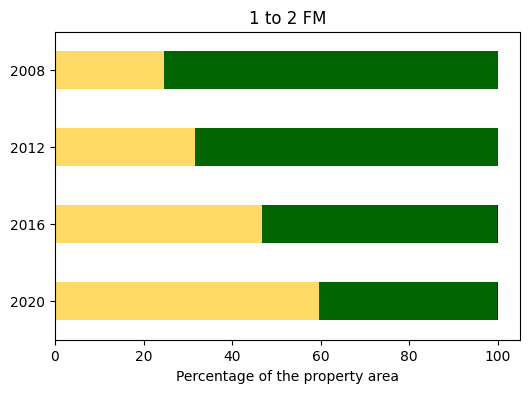

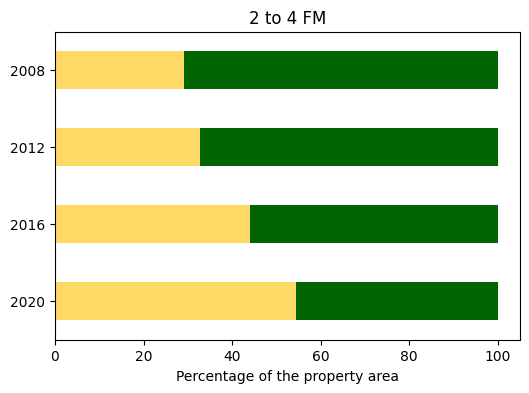

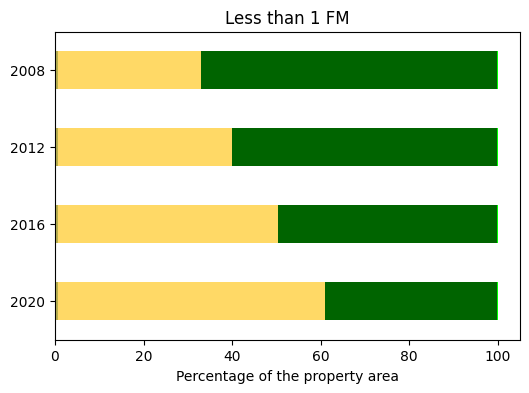

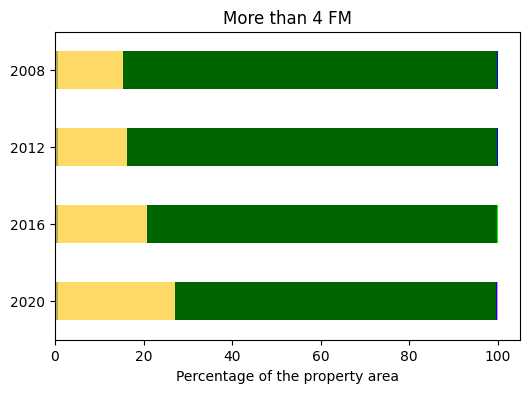

In [ ]:
for mf in lulc_mf:
  df = lulc_im_year_mean_perc[lulc_im_year_mean_perc['Módulos Fiscais']== mf]
  df1 = df.drop('Módulos Fiscais',axis=1)
  code  = []
  classes = df1.columns
  classes = classes.values.tolist()
  cl = classes.pop(0)
  for i in classes:
    c = value.loc[value['nome'] == i, 'code'].tolist()
    code.append(c)
  code_colors = [item for sublist in code for item in sublist] #flatten list

  fig=df1.plot(x = 'ano',    kind = 'barh',    stacked = True,    title = f'{mf}',    mark_right = True,    figsize=(6,4),    color = code_colors, legend = False )
  fig.ticklabel_format(style='plain', useOffset=False, axis='x')
  fig.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) #split thousands with "."
  # fig.set_xlabel('Área (km\u00b2)')
  # fig.set_xlabel('Área (hectares)')
  fig.set_xlabel('Percentage of the property area')
  fig.set_ylabel('')
  # fig.legend(labels=lulc_names, loc='lower center', bbox_to_anchor=(0.5, -0.45))
  fig.figure.savefig(f'/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/FIGURAS/LULC_IMOVEL_perc_mean_{mf}.png', dpi =500,bbox_inches = 'tight')
df1.head()

In [ ]:
value_recode = pd.read_csv('/content/drive/MyDrive/CAR_RL_Labrea/DADOS/code_mapbiomas_legend_recode.csv',sep=';')
value_recode['value'] = value_recode['value'].astype(str)

val_dict_recode = dict(zip(value_recode.value, value_recode.nome))
val_dict_recode

{'1': 'Floresta',
 '2': 'Formação Natural não Florestal',
 '3': 'Agropecuária',
 '4': 'Área não Vegetada',
 '5': "Corpo D'água"}

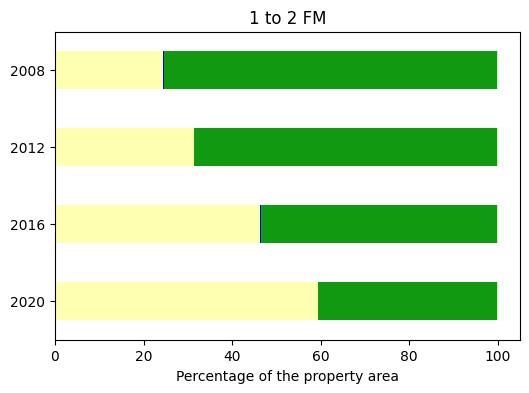

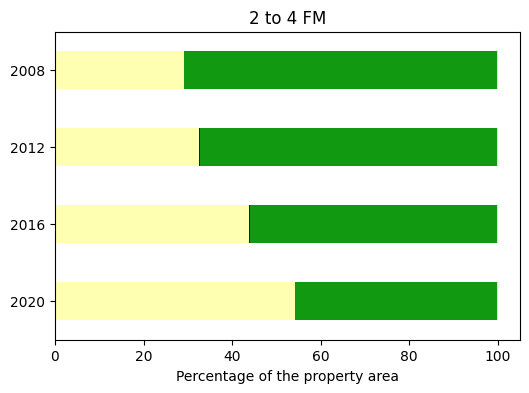

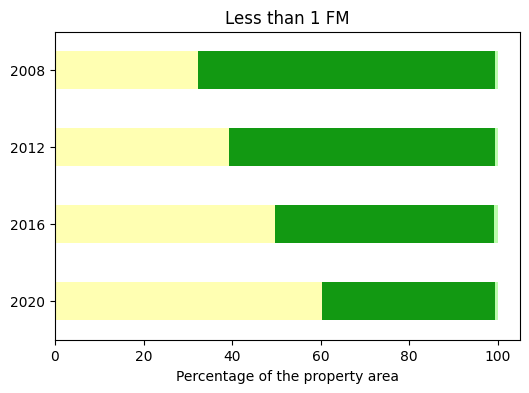

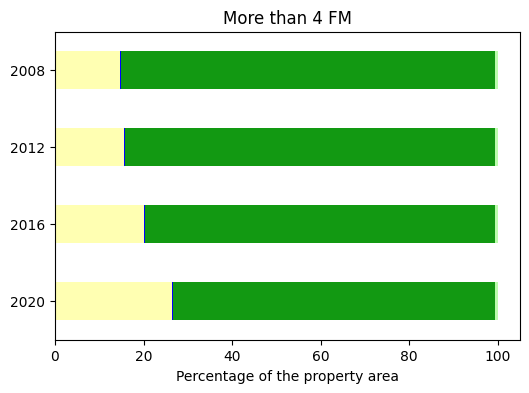

In [ ]:
for mf in lulc_mf:
  df = recode_im_year_mean_perc[recode_im_year_mean_perc['Módulos Fiscais']== mf]
  df1 = df.drop('Módulos Fiscais',axis=1)

  code  = []
  classes = df1.columns
  classes = classes.values.tolist()
  cl = classes.pop(0)
  for i in classes:
    c = value_recode.loc[value_recode['nome'] == i, 'code'].tolist()
    code.append(c)
  code_colors_rec = [item for sublist in code for item in sublist] #flatten list

  fig=df1.plot(x = 'ano',    kind = 'barh',    stacked = True,    title = f'{mf}',    mark_right = True,    figsize=(6,4),    color = code_colors_rec, legend = False )
  fig.ticklabel_format(style='plain', useOffset=False, axis='x')
  fig.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}')) #split thousands with "."
  # fig.set_xlabel('Área (km\u00b2)')
  # fig.set_xlabel('Área (hectares)')
  fig.set_xlabel('Percentage of the property area')
  fig.set_ylabel('')
  # fig.legend(labels=superclasses, loc='lower center', bbox_to_anchor=(0.5, -0.45))
  fig.figure.savefig(f'/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/FIGURAS/RECODE_IMOVEL_perc_mean_{mf}.png', dpi =500,bbox_inches = 'tight')



**Análise dos quantitativos de vegetação nativa**

In [ ]:
df_recode_filtered.head()

,COD_IMOVEL,ano,Floresta,Formação Natural não Florestal,Agropecuária,Área não Vegetada,Corpo D'água,Total,MF,Módulos Fiscais
0,AM-1302405-B78F002E29244400835FEA9ABA8E6AC6,2020,1843.65,0.0,2.25,0.0,0.0,1845.9,18.459,More than 4 FM
1,AM-1302405-B78F002E29244400835FEA9ABA8E6AC6,2008,1778.76,0.0,67.14,0.0,0.0,1845.9,18.459,More than 4 FM
2,AM-1302405-B78F002E29244400835FEA9ABA8E6AC6,2012,1823.67,0.0,22.23,0.0,0.0,1845.9,18.459,More than 4 FM
3,AM-1302405-B78F002E29244400835FEA9ABA8E6AC6,2016,1834.38,0.0,11.52,0.0,0.0,1845.9,18.459,More than 4 FM
4,AM-1302405-576D22A93BAA4AD7A576F6305E3E6C69,2012,948.78,0.0,43.92,0.0,0.0,992.7,9.927,More than 4 FM


In [ ]:
count = imovel_vegnat['COD_IMOVEL'].nunique()
year = imovel_vegnat['ano'].unique()

for y in year:
  irregular_rl = imovel_vegnat[(imovel_vegnat['% Vegetação Nativa']<80) & (imovel_vegnat['ano']==y)]
  irr = irregular_rl.shape[0]
  perc_irr = irr/count*100
  print(f'Em {y}, havia {irr} imóveis com insuficiência de Reserva Legal({perc_irr:.2f}%).')



print (f'Foram analisados {count} imóveis')

Em 2020, havia 2610 imóveis com insuficiência de Reserva Legal(74.08%).
Em 2008, havia 1415 imóveis com insuficiência de Reserva Legal(40.16%).
Em 2012, havia 1765 imóveis com insuficiência de Reserva Legal(50.10%).
Em 2016, havia 2258 imóveis com insuficiência de Reserva Legal(64.09%).
Foram analisados 3523 imóveis


In [ ]:
count = imovel_vegnat['COD_IMOVEL'].nunique()
year = imovel_vegnat['ano'].unique()

for y in year:
  irregular_rl = imovel_vegnat[(imovel_vegnat['% Vegetação Nativa']<50) & (imovel_vegnat['ano']==y)]
  irr = irregular_rl.shape[0]
  perc_irr = irr/count*100
  print(f'Em {y}, havia {irr} imóveis com insuficiência de Reserva Legal({perc_irr:.2f}%).')



print (f'Foram analisados {count} imóveis')

Em 2020, havia 1852 imóveis com insuficiência de Reserva Legal(52.57%).
Em 2008, havia 774 imóveis com insuficiência de Reserva Legal(21.97%).
Em 2012, havia 973 imóveis com insuficiência de Reserva Legal(27.62%).
Em 2016, havia 1415 imóveis com insuficiência de Reserva Legal(40.16%).
Foram analisados 3523 imóveis


In [ ]:
df_vegnat_mean = imovel_vegnat.groupby(['ano','Módulos Fiscais'])['% Vegetação Nativa'].mean().reset_index().sort_values(by=['ano'], axis=0, ascending=False, inplace=False)

In [ ]:
df_vegnat_mean.columns = ['Year','Fiscal Modules', '% Native vegetation']
df_vegnat_mean

,Year,Fiscal Modules,% Native vegetation
12,2020,1 to 2 FM,40.630578
13,2020,2 to 4 FM,45.818876
14,2020,Less than 1 FM,39.623653
15,2020,More than 4 FM,73.264907
8,2016,1 to 2 FM,53.580016
9,2016,2 to 4 FM,56.073445
10,2016,Less than 1 FM,50.339840
11,2016,More than 4 FM,79.690296
4,2012,1 to 2 FM,68.646176
5,2012,2 to 4 FM,67.349596


In [ ]:
index_pivot = df_vegnat_mean['Fiscal Modules']

df_vegnat_p = df_vegnat_mean.pivot_table(values='% Native vegetation', index=index_pivot, columns='Year', aggfunc='first')
df_vegnat_p

Year,2008,2012,2016,2020
Fiscal Modules,,,,
1 to 2 FM,75.488723,68.646176,53.580016,40.630578
2 to 4 FM,70.885792,67.349596,56.073445,45.818876
Less than 1 FM,67.663585,60.746319,50.339840,39.623653
More than 4 FM,85.137689,84.202964,79.690296,73.264907


In [ ]:
df_vegnat_p.index = pd.CategoricalIndex(df_vegnat_p.index, categories= ['More than 4 FM','2 to 4 FM','1 to 2 FM','Less than 1 FM'])
df_vegnat_p.sort_index(level=0, inplace=True)
df_vegnat_p

Year,2008,2012,2016,2020
Fiscal Modules,,,,
More than 4 FM,85.137689,84.202964,79.690296,73.264907
2 to 4 FM,70.885792,67.349596,56.073445,45.818876
1 to 2 FM,75.488723,68.646176,53.580016,40.630578
Less than 1 FM,67.663585,60.746319,50.339840,39.623653


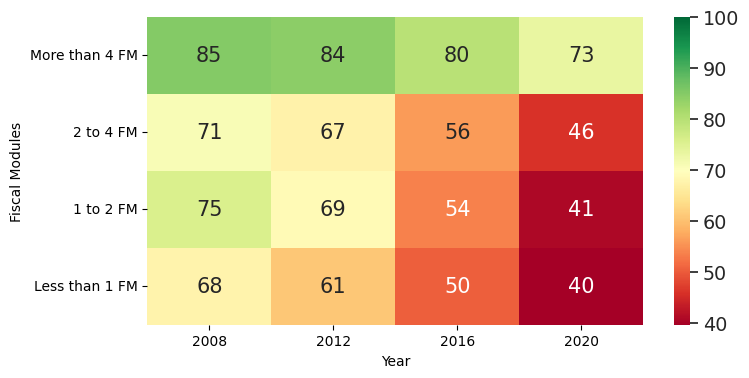

In [ ]:
f, ax = plt.subplots(figsize=(8,4))
sns.set(font_scale=1.25)
ax = sns.heatmap(df_vegnat_p, annot = True, annot_kws={'size': 15}, cmap='RdYlGn',vmax=100)
# ax.set_title ('Average percentage of the property area with native vegetation')
f.savefig('/content/drive/MyDrive/CAR_RL_Labrea/OUTPUT/ANALISES/FIGURAS/RECODE_IMOVEL_heatmap_modulos.png', dpi =500,bbox_inches = 'tight')